In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report , accuracy_score,precision_score,recall_score , f1_score,hinge_loss

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
customer_data=pd.read_csv("datasets_2/customers_data.csv")

In [3]:
customer_data.head()

,debt_to_income_ratio,credit_score,default
0,0.177052,773.283908,0
1,0.177856,707.287883,0
2,0.184835,745.822031,0
3,0.100024,802.684603,0
4,0.375014,458.766013,1


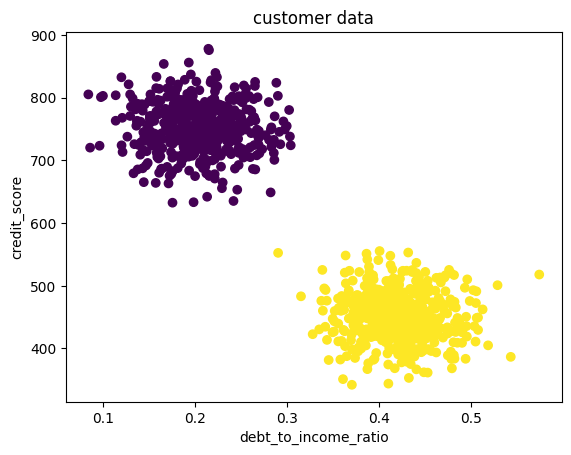

In [4]:
plt.scatter(customer_data['debt_to_income_ratio'],customer_data['credit_score'],c=customer_data['default'])
plt.xlabel("debt_to_income_ratio")
plt.ylabel("credit_score")
plt.title("customer data")
plt.show()

In [7]:
X=customer_data.drop(['default'],axis=1)
y=customer_data['default']
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)


In [42]:
model_svm_hard=SVC(C=1e10,kernel="linear",probability=True,random_state=42)
model_svm_hard.fit(X_scaled,y)


SVC(C=10000000000.0, kernel='linear', probability=True, random_state=42)

In [43]:
w0=model_svm_hard.intercept_
w1=model_svm_hard.coef_[0][0]
w2=model_svm_hard.coef_[0][1]
x_values=np.linspace(X_scaled[:,0].min()-1,X_scaled[:,0].max()+1,500)

In [44]:
decision_boundary=-1*((w1/w2)*x_values+(w0/w2))


In [45]:

margin=1/np.sqrt(np.sum(model_svm_hard.coef_[0]**2))
margin_up=decision_boundary+margin
margin_down=decision_boundary-margin

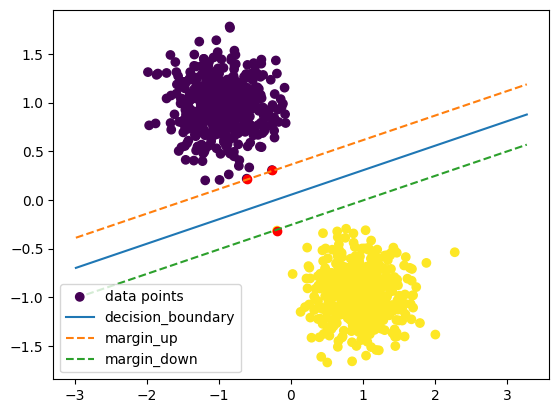

In [46]:
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=customer_data['default'],label="data points")
plt.plot(x_values,decision_boundary,label="decision_boundary")
plt.plot(x_values,margin_up,"--",label="margin_up")
plt.plot(x_values,margin_down,"--",label="margin_down")
plt.scatter(model_svm_hard.support_vectors_[:,0],model_svm_hard.support_vectors_[:,1],color="r")
plt.legend()
plt.show()


In [47]:
print(f"There are {model_svm_hard.n_support_.sum()} support vectors")

There are 3 support vectors


In [48]:
test_data=pd.read_csv('datasets_2/customers_data_test.csv')
X_test=test_data.drop(['default'],axis=1)
y_test=test_data['default']
X_test_scaled=scaler.transform(X_test)


In [49]:
y_pred=model_svm_hard.predict(X_test_scaled)
print(classification_report(y_test,y_pred,labels=y_test.unique().astype(str)))


              precision    recall  f1-score   support

           1       0.99      0.98      0.98       100
           0       0.98      0.99      0.99       100

   micro avg       0.98      0.98      0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



In [60]:
print(f"the hinge loss is {hinge_loss(y_test.to_numpy(),model_svm_hard.decision_function(X_test_scaled))}")
print(f"the accuracy score is {accuracy_score(y_test,y_pred)}")
print(f"the precision is {precision_score(y_test,y_pred)}")
print(f"the recall score is {recall_score(y_test,y_pred)}")
print(f"f1 score is {f1_score(y_test,y_pred)}")

the hinge loss is 0.03539411640109088
the accuracy score is 0.985
the precision is 0.98989898989899
the recall score is 0.98
f1 score is 0.9849246231155779
